In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from mgc.ksample import KSample

In [3]:
# Set constants. Please ONLY change this block when running
NUM_TESTS = 200
N_SAMP = 100
PROB = 0.2

In [4]:
def calc_pvals(hyp_test):
    """Calculate p-values for each test"""
    pvals = np.zeros(NUM_TESTS)
    
    # run hypothesis test over 2 iid binomials
    for i in tqdm(range(NUM_TESTS)):
        x = np.random.binomial(N_SAMP, PROB, size=(N_SAMP, 1))
        y = np.random.binomial(N_SAMP, PROB, size=(N_SAMP, 1))
        
        _, pvalue = hyp_test.test(x, y, workers=-1)
        pvals[i] = pvalue
        
    return pvals

In [5]:
def hist_pvalues(pvals):
    """Plot histogram of the p-values"""

    # weights of the histograms
    weights = np.ones_like(pvals)/float(len(pvals))

    plt.hist(pvals, bins=np.arange(0, 1, 0.01), weights=weights)
    plt.xlabel('P-values')
    plt.ylabel('Fraction of Occurrence')
    plt.title('P-values of iid Binomials (n=%.f, p=%.1f)' % (NUM_TESTS, PROB))
    plt.show()

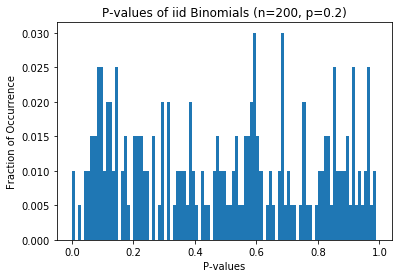

In [6]:
pvals = calc_pvals(KSample("dcorr"))
hist_pvalues(pvals)